In [7]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
#from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

#### MinMaxScaler 

- is the probably the most famous scaling algorithm
- An alternative approach to Z-score normalization (or standardization)
- If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

> However, it is __sensitive to outliers__, so if there are outliers in the data, you might want to consider the __Robust Scaler__.

$$ X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}$$

> - It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
> - The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

In [8]:
data = [[10, 100,  1000], 
        [20, 200,  2000], 
        [30, 300,  3000], 
        [40, 400,  4000]]

In [9]:
# Instantiation of the min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
scaler.feature_range

(0, 1)

In [11]:
# Fit/training the scaler
scaler.fit(data)

MinMaxScaler()

In [12]:
scaler.data_min_, scaler.data_max_,  scaler.data_range_

(array([  10.,  100., 1000.]),
 array([  40.,  400., 4000.]),
 array([  30.,  300., 3000.]))

In [13]:
# Per feature maximum seen in the data
print('MAX           : ', scaler.data_max_)

# Per feature minimum seen in the data
print('MIN           : ', scaler.data_min_)

# Per feature range (data_max_ - data_min_) seen in the data
print('Range         : ', scaler.data_range_)

# Desired range of transformed data.
print('Feature Range : ', scaler.feature_range)

# Per feature relative scaling of the data.
print('Scale         : ', scaler.scale_)

MAX           :  [  40.  400. 4000.]
MIN           :  [  10.  100. 1000.]
Range         :  [  30.  300. 3000.]
Feature Range :  (0, 1)
Scale         :  [0.03333333 0.00333333 0.00033333]


In [14]:
# Scaling features of X according to feature_range.
scaler.transform(data)

array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])

In [15]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/pima.txt"

In [16]:
# separate array into input and output components

dataframe = pd.read_csv(location)
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
array = dataframe.values

In [18]:
type(array)

numpy.ndarray

In [19]:
np.set_printoptions(suppress=True, linewidth=120) #prevent numpy exponential 

In [20]:
array[:5]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,  32.   ,   1.   ],
       [  1.   ,  89.   ,  66.   ,  23.   ,  94.   ,  28.1  ,   0.167,  21.   ,   0.   ],
       [  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,  33.   ,   1.   ]])

In [21]:
X = array[:, 0:8]
y = array[:, 8]

In [22]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [24]:
rescaledX = scaler.fit_transform(X)

In [25]:
# transformed data
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938, 0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658, 0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307, 0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556, 0.03333333]])

In [26]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

df_scaled = pd.DataFrame(rescaledX, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


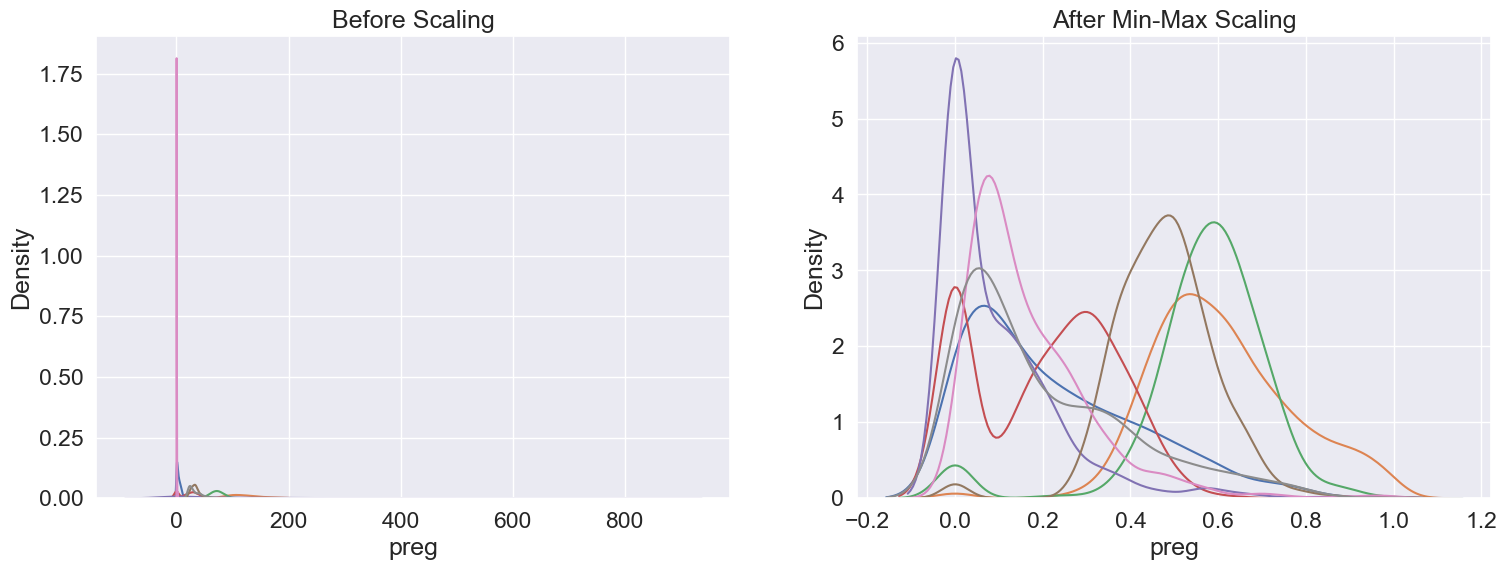

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

> Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

## __StandardScaler__ 

- assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

- The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$$ \frac {x_i – mean(x)} {stdev(x)}$$

If data is __not normally distributed, this is not the best scaler to use.__

In [28]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/pima.txt"

In [29]:
# load the training data from pima data set
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)
dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [31]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [36]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [37]:
scaler.n_features_in_

8

In [38]:
scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,  79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [39]:
scaler.var_

array([   11.33927239,  1020.91726176,   374.15944926,   254.14189996, 13263.88687473,    62.07904648,     0.1096357 ,
         138.1229638 ])

In [40]:
rescaledX = scaler.transform(X)

In [41]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [32]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

df_scaled = pd.DataFrame(rescaledX, columns=colnames)

df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


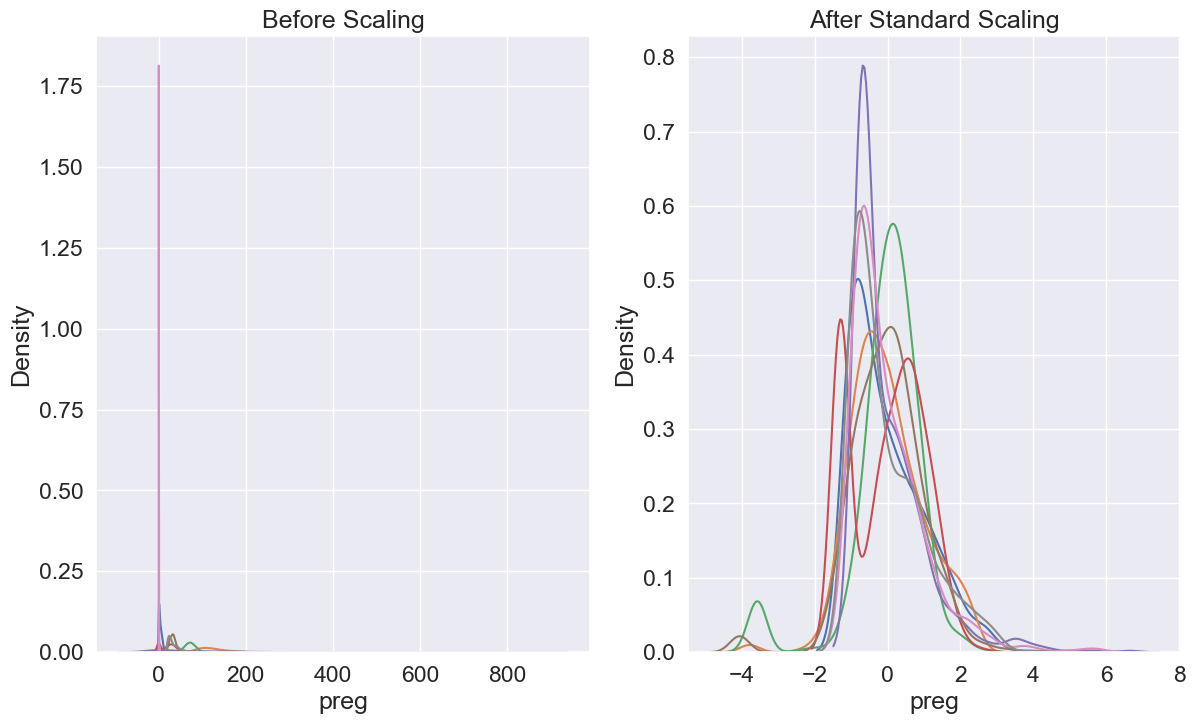

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

## Robust Scaler 

The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the `interquartile range`, `rathar than the min - max`, so that it is `robust to outliers`. 

In [34]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/pima.txt"

In [35]:
# load the training data from pima data set
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# separate array into input and output components

dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [37]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [38]:
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df_before_scale)

In [39]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_scaled = pd.DataFrame(robust_scaled_df, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


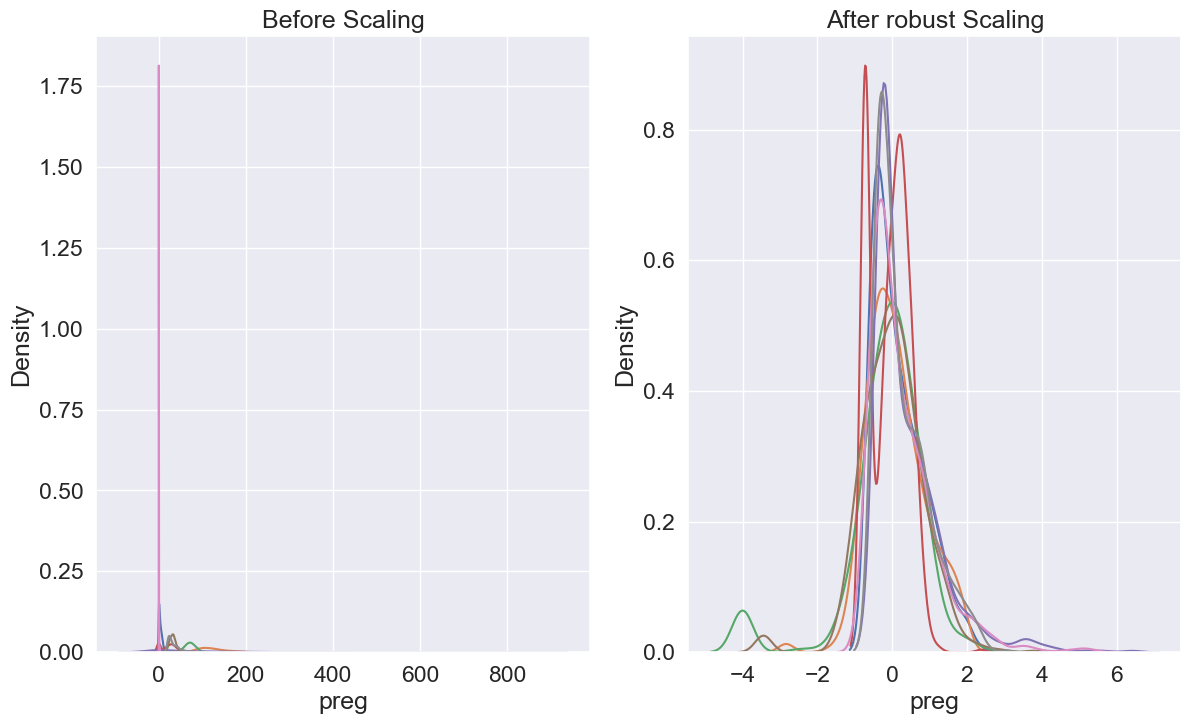

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After robust Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

-----------------
ML pipeline
-------------
0. Dataset
    - training
    - testing
    - real test data (live)
1. Preprocessing (scaling) - some scaling is decided
    - scale the training data
        - train the ML (Neural Network) with the scaled data
            - put the model in prod
2. use the live data for some pred (ML)
    - scale test data
        - use SAME scaler that created in the training
            - save the scaler during the training time


## Normalizer
The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

$$ \dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}} $$

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

In [41]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [42]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80,   1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [43]:
df

,x1,y1,z1
0,24.0,-22.0,98.0
1,-38.0,5.0,35.0
2,-10.0,45.0,124.0
3,29.0,-7.0,87.0
4,-49.0,65.0,-85.0
...,...,...,...
995,-100.0,-38.0,59.0
996,32.0,-33.0,145.0
997,51.0,-14.0,-77.0
998,-64.0,69.0,-93.0


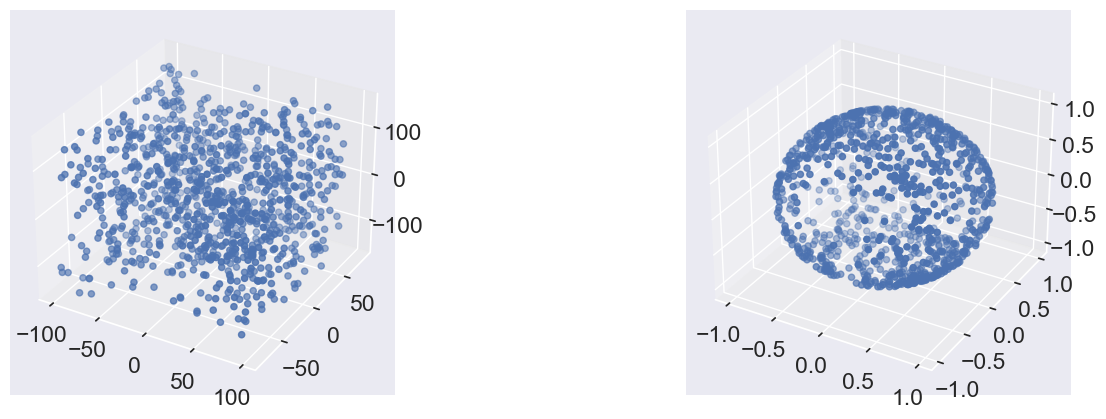

In [44]:
scaler    = Normalizer()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1']);

the points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.

## Partial scaling

In [42]:
import pandas as pd
import numpy as np

In [43]:
location = 'https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/Advertising.csv'

In [44]:
df = pd.read_csv(location, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [45]:
df.shape

(200, 4)

#### Add 2 columns
- Size   { Small, Large}
- Area { Rural, Semi-Urban, Urban}

In [46]:
np.random.rand(len(df))

array([0.872, 0.419, 0.347, 0.944, 0.908, 0.309, 0.09 , 0.657, 0.975, 0.343, 0.752, 0.402, 0.356, 0.658, 0.706, 0.66 ,
       0.326, 0.372, 0.486, 0.932, 0.563, 0.147, 0.934, 0.911, 0.746, 0.397, 0.525, 0.19 , 0.116, 0.621, 0.887, 0.777,
       0.035, 0.32 , 0.969, 0.946, 0.429, 0.068, 0.832, 0.114, 0.626, 0.23 , 0.528, 0.42 , 0.349, 0.225, 0.97 , 0.81 ,
       0.019, 0.669, 0.249, 0.472, 0.601, 0.207, 0.711, 0.971, 0.012, 0.032, 0.515, 0.158, 0.956, 0.748, 0.745, 0.422,
       0.895, 0.543, 0.863, 0.124, 0.115, 0.688, 0.829, 0.95 , 0.68 , 0.702, 0.174, 0.729, 0.211, 0.127, 0.536, 0.597,
       0.252, 0.82 , 0.635, 0.24 , 0.64 , 0.554, 0.244, 0.065, 0.246, 0.153, 0.061, 0.363, 0.291, 0.813, 0.311, 0.773,
       0.429, 0.492, 0.856, 0.882, 0.722, 0.203, 0.923, 0.254, 0.222, 0.462, 0.407, 0.282, 0.15 , 0.164, 0.734, 0.405,
       0.682, 0.612, 0.42 , 0.7  , 0.476, 0.012, 0.056, 0.011, 0.509, 0.452, 0.303, 0.6  , 0.502, 0.884, 0.006, 0.401,
       0.899, 0.353, 0.326, 0.433, 0.715, 0.274,

In [47]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
df.loc[mask_large, 'Size'] = 'large'

# assign roughly one third of observations to each group
nums          = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban    = nums > 0.66

df['Area'] = 'rural'

# Series.loc is a purely label-location based indexer for selection by label
df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban,    'Area'] = 'urban'

df.head()

,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,large,urban
2,44.5,39.3,45.1,10.4,small,suburban
3,17.2,45.9,69.3,9.3,small,suburban
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


In [48]:
df = pd.get_dummies(df, columns=['Size', 'Area'])
df.head()

,TV,radio,newspaper,sales,Size_large,Size_small,Area_rural,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,1,0,0,0,1
2,44.5,39.3,45.1,10.4,0,1,0,1,0
3,17.2,45.9,69.3,9.3,0,1,0,1,0
4,151.5,41.3,58.5,18.5,0,1,0,0,1
5,180.8,10.8,58.4,12.9,1,0,0,1,0


In [49]:
X_df = df.drop(['sales'], axis=1)
y_df = df['sales']

In [ ]:
# ct = ColumnTransformer(
#         [ ('std-sclr', StandardScaler(), ['TV', 'radio', 'newspaper']),
#           ('minmax',   MinMaxScaler(),   ['TV1', 'radio1', 'newspaper1'])
#         ],
#         remainder='passthrough'
#     )

# scaled_X = ct.fit_transform(X_df)

# scaled_X_df = pd.DataFrame(scaled_X, columns=X_df.columns)

# scaled_X_df.head()

In [50]:
ct = ColumnTransformer(
        [ ('std-sclr', StandardScaler(), ['TV', 'radio']),
          ('min-ax',   MinMaxScaler(),   ['newspaper'])
           
        ],
        remainder='passthrough'
    )

scaled_X = ct.fit_transform(X_df)

scaled_X_df = pd.DataFrame(scaled_X, columns=X_df.columns)

scaled_X_df.head()

,TV,radio,newspaper,Size_large,Size_small,Area_rural,Area_suburban,Area_urban
0,0.969852,0.981522,0.605981,1.0,0.0,0.0,0.0,1.0
1,-1.197376,1.082808,0.394019,0.0,1.0,0.0,1.0,0.0
2,-1.516155,1.528463,0.606860,0.0,1.0,0.0,1.0,0.0
3,0.052050,1.217855,0.511873,0.0,1.0,0.0,0.0,1.0
4,0.394182,-0.841614,0.510994,1.0,0.0,0.0,1.0,0.0


In [59]:
Q1= np.quantile([10, 20,30, 40, 50],.25)

Q2= np.quantile([10, 20,30, 40, 50],.5)
Q3= np.quantile([10, 20,30, 40, 50],.75)

In [60]:
IQR = Q3 - Q1
IQR

20.0

In [61]:
high_citoff = Q3 + IQR * 1.5
high_citoff

70.0

In [62]:
low_citoff = Q1 - IQR * 1.5
low_citoff

-10.0

-------------------------------------
#### Best Practices for Scaling Data in Data Science/Machine Learning
----------------------------------
1. **Understand the Need for Scaling**:
   - **Algorithm Sensitivity**: Recognize that some algorithms (e.g., KNN, SVM, gradient descent-based models) are sensitive to the scale of features, while others (e.g., tree-based models) are less affected.
   - **Feature Comparability**: Scaling ensures that features with larger ranges do not disproportionately influence the model's performance.

2. **Choose the Right Scaling Technique**:
   - **Min-Max Scaling (Normalization)**: Scales features to a specific range, usually [0, 1], which is useful when the data distribution is not Gaussian.
     ```python
     from sklearn.preprocessing import MinMaxScaler
     scaler = MinMaxScaler()
     df_scaled = scaler.fit_transform(df[['feature1', 'feature2']])
     ```
   - **Standardization (Z-score Scaling)**: Centers the data around the mean with a standard deviation of 1. Ideal for data that follows a Gaussian distribution.
     ```python
     from sklearn.preprocessing import StandardScaler
     scaler = StandardScaler()
     df_scaled = scaler.fit_transform(df[['feature1', 'feature2']])
     ```
   - **Robust Scaling**: Uses the median and IQR to scale data, making it robust to outliers.
     ```python
     from sklearn.preprocessing import RobustScaler
     scaler = RobustScaler()
     df_scaled = scaler.fit_transform(df[['feature1', 'feature2']])
     ```

3. **Handle Outliers Before Scaling**:
   - **Detect and Treat Outliers**: Outliers can skew scaling, particularly with Min-Max and Z-score scaling. Consider handling outliers before scaling.
     ```python
     # Use IQR or Z-score methods to detect and handle outliers
     ```

4. **Scale After Data Splitting**:
   - **Avoid Data Leakage**: Always scale the training data first, then apply the same scaling parameters to the validation/test data to prevent data leakage.
     ```python
     scaler = StandardScaler()
     X_train_scaled = scaler.fit_transform(X_train)
     X_test_scaled = scaler.transform(X_test)
     ```

5. **Consistency Across Pipelines**:
   - **Use Pipelines**: Ensure consistent scaling by incorporating scaling into machine learning pipelines.
     ```python
     from sklearn.pipeline import Pipeline
     pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
     pipeline.fit(X_train, y_train)
     ```

6. **Scaling Categorical Features**:
   - **Avoid Scaling Ordinal/One-Hot Encoded Data**: Typically, scaling is not necessary for categorical features encoded as one-hot vectors or ordinal integers. Focus on scaling continuous numerical features.
     ```python
     # Scale only continuous numerical features
     ```

7. **Monitor the Impact on Model Performance**:
   - **Evaluate Different Scales**: Experiment with different scaling methods to see which one works best for your specific model and dataset.
     ```python
     # Compare model performance with Min-Max, Standard, and Robust scaling
     ```

8. **Consider Log Transformations**:
   - **Handle Skewed Data**: Apply log transformations to positively skewed data before scaling to stabilize variance and reduce skewness.
     ```python
     df['log_feature'] = np.log(df['feature'] + 1)
     ```

9. **Address Sparse Data**:
   - **Sparse Matrices**: Be cautious when scaling sparse data, as it can lead to loss of sparsity. Use scaling techniques that preserve the sparse structure.
     ```python
     from sklearn.preprocessing import MaxAbsScaler
     scaler = MaxAbsScaler()
     sparse_scaled = scaler.fit_transform(sparse_matrix)
     ```

10. **Evaluate Feature Importance Post-Scaling**:
    - **Reassess Feature Impact**: After scaling, evaluate whether the relative importance of features has changed, especially in models that are sensitive to feature scaling.
     ```python
     # Reassess feature importance after scaling
     ```

11. **Use Scalable Techniques for Large Datasets**:
    - **Incremental Scaling**: For very large datasets, consider incremental scaling techniques that scale data in batches to manage memory efficiently.
     ```python
     from sklearn.preprocessing import StandardScaler
     scaler = StandardScaler()
     for batch in data_batches:
         scaled_batch = scaler.partial_fit_transform(batch)
     ```

12. **Document Scaling Process**:
    - **Maintain Records**: Document the scaling method and parameters used, ensuring that the same approach is applied consistently across different phases of the project.
     ```python
     # Log the scaling method, parameters, and application steps
     ```

13. **Scaling Before Dimensionality Reduction**:
    - **PCA and Scaling**: When applying dimensionality reduction techniques like PCA, ensure that the data is scaled beforehand to give each feature equal weight in the analysis.
     ```python
     from sklearn.decomposition import PCA
     pca = PCA(n_components=2)
     X_pca = pca.fit_transform(scaled_data)
     ```

14. **Beware of Scaling Artifacts**:
    - **Check for Artifacts**: After scaling, review the data to ensure no unintended artifacts (e.g., loss of feature variance) have been introduced.
     ```python
     # Visualize scaled data to ensure it is correctly processed
     ```
